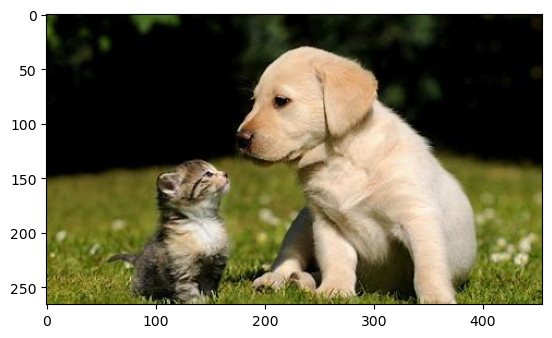

In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

img = plt.imread('dogcat.png')
plt.imshow(img)
plt.show()

## 定义在两种表示之间的转换函数

In [2]:
def box_corner_to_center(boxes):
    """从（左上，右下）转换到（中间，宽度，高度）"""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = torch.stack((cx, cy, w, h), axis=-1)
    return boxes

def box_center_to_corner(boxes):
    """从（中间，宽度，高度）转换到（左上，右下）"""
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = torch.stack((x1, y1, x2, y2), axis=-1)
    return boxes

## 定义图像中狗和猫的边框

In [11]:
# 宽高宽高
dog_box, cat_box = [180.0, 20.0, 390.0, 260.0], [80.0, 130.0, 170, 260.0]
boxes = torch.tensor([dog_box, cat_box])
box_center_to_corner(box_corner_to_center(boxes)) == boxes

tensor([[True, True, True, True],
        [True, True, True, True]])

## 将边界框在图中画出

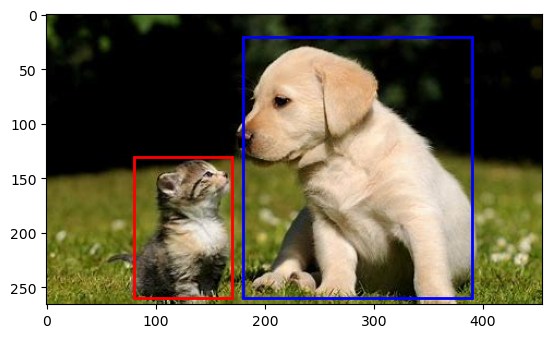

In [12]:
def bbox_to_rect(bbox, color):
    """将边界框(左上x,左上y,右下x,右下y)格式转换成matplotlib格式"""
    return plt.Rectangle(xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0],
                         height=bbox[3]-bbox[1], fill=False, edgecolor=color,
                         linewidth=2)
fig = plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_box, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_box, 'red'))